# Iris Classification

This is my Second Task for Bharat Intern Using Machine Learning to classify Iris flower based on its given features 


This is a Classification Problem.
Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data.

In [25]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

Dataset contains 150 Rows and 5 Columns

In [5]:
#checking for null values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no values 

In [6]:
#seeing distribution of species
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

All species are equally present

Performing EDA

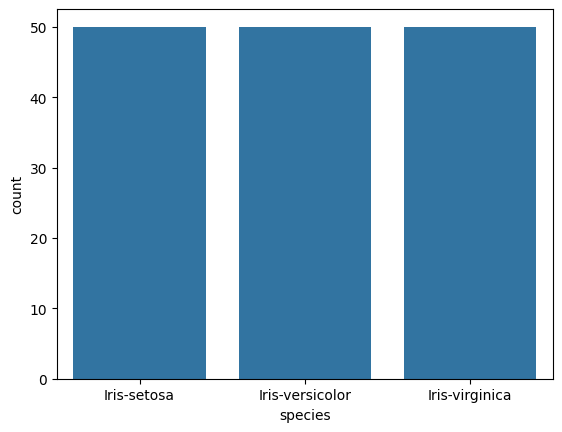

In [7]:
sns.countplot(x='species', data=df )
plt.show()

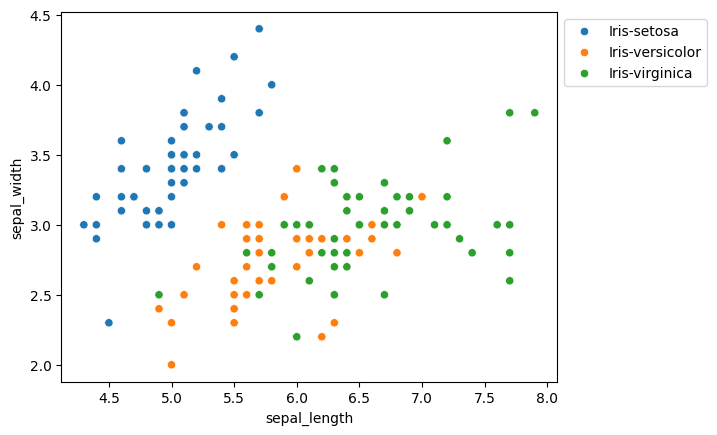

In [8]:
sns.scatterplot(x='sepal_length', y='sepal_width',
				hue='species', data=df, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

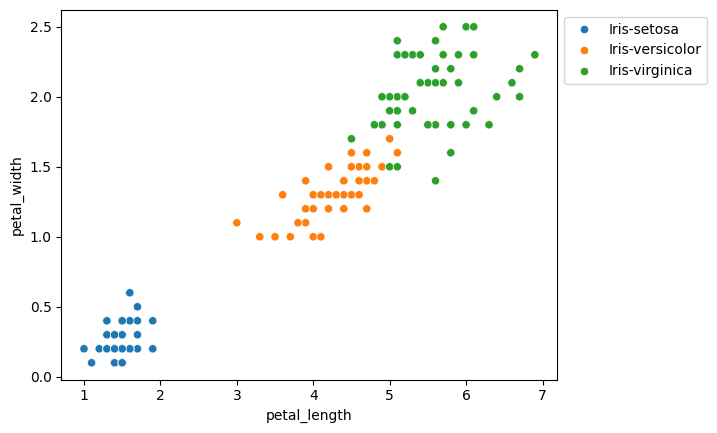

In [9]:
sns.scatterplot(x='petal_length', y='petal_width',
				hue='species', data=df, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

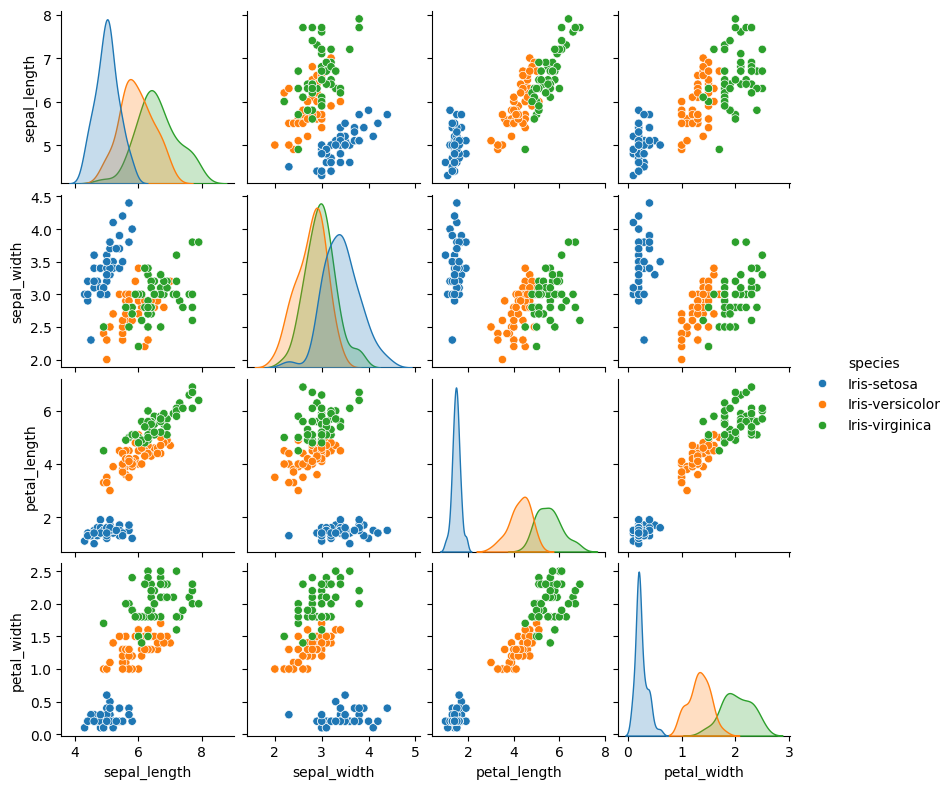

In [10]:
sns.pairplot(df,hue='species', height=2)

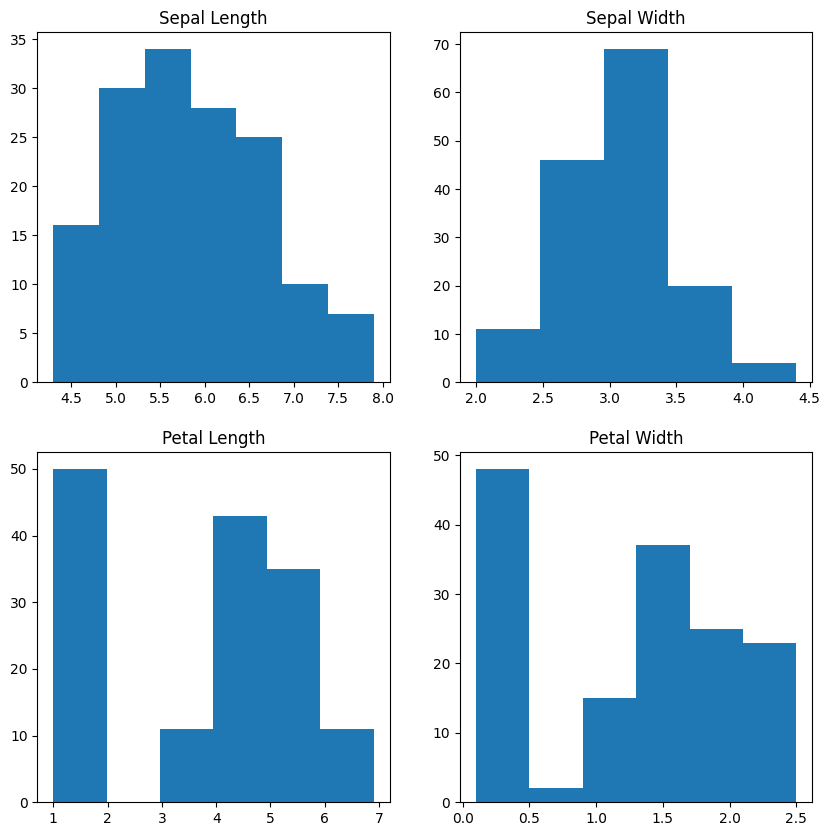

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal_length'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal_width'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal_length'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal_width'], bins=6);

In [14]:
data=df.drop(['species'],axis=1)

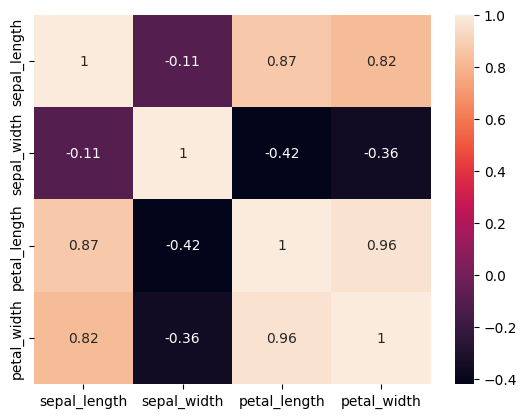

In [16]:
sns.heatmap(data.corr(method='pearson'),
			annot = True)

plt.show()

Feature Engineering and Data splitting

In [17]:
import tensorflow as tf 

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = tf.keras.utils.to_categorical(y)

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.8)

input_shape = [X_train.shape[1]]

In [19]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 152995 (597.64 KB)
Trainable params: 15299

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
    metrics=['accuracy'],)

In [23]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

Epoch 1/50


1/1 [==============================] - 6s 6s/step - loss: 1.1026 - accuracy: 0.3333 - val_loss: 1.0488 - val_accuracy: 0.6667
Epoch 2/50
1/1 [==============================] - 0s 158ms/step - loss: 1.0473 - accuracy: 0.6667 - val_loss: 1.0032 - val_accuracy: 0.6667
Epoch 3/50
1/1 [==============================] - 0s 181ms/step - loss: 1.0013 - accuracy: 0.6667 - val_loss: 0.9783 - val_accuracy: 0.6667
Epoch 4/50
1/1 [==============================] - 0s 155ms/step - loss: 0.9759 - accuracy: 0.6667 - val_loss: 0.9390 - val_accuracy: 0.6667
Epoch 5/50
1/1 [==============================] - 0s 169ms/step - loss: 0.9355 - accuracy: 0.6667 - val_loss: 0.8948 - val_accuracy: 0.6667
Epoch 6/50
1/1 [==============================] - 0s 164ms/step - loss: 0.8924 - accuracy: 0.6667 - val_loss: 0.8499 - val_accuracy: 0.6667
Epoch 7/50
1/1 [==============================] - 0s 158ms/step - loss: 0.8481 - accuracy: 0.6750 - val_loss: 0.8113 - val_accuracy: 0.6667
Epoch 8/50
1/1 [=====

<Axes: title={'center': 'Accuracy'}>

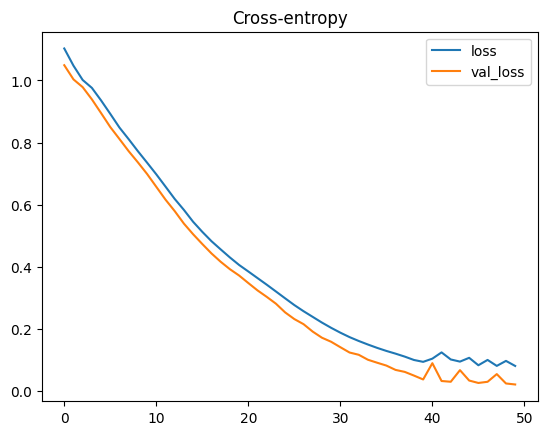

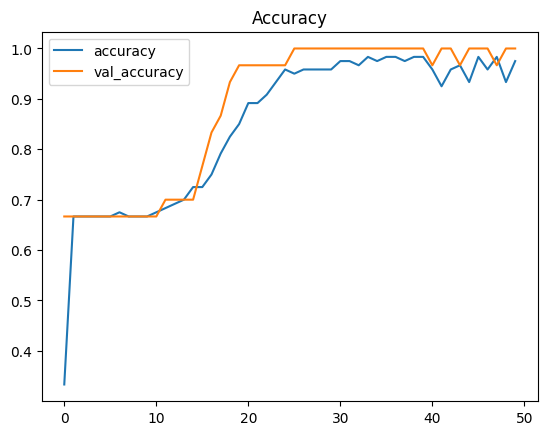

In [24]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=512,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

# This is my second task of Bharat Intern as Machine Learning Intern 

# In this task I have made a model to classify Iris flower by its features 

# While making model I have made use of Python,Sklearn and Tensorflow

# This task has helped to upskill me in EDA, Feature Engineering, Building Deep Learning Model and Evaluation

# Feel free to modify code and make contributions